In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
font = {
    'family':'monospace',
    'size':21,
    'weight': 'semibold',
}
plt.rc('font', **font)

In [8]:
from active_distance_systematic_spectrum import trellis, find_minweight_path, find_minweight_cword, find_spectrum

In [9]:
hdout = np.array([0, 1, 1, 2])
out = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [10]:
polyoct = np.array([117, 155])
polydec = np.array([int(str(i), 8) for i in polyoct])
polybin = np.array([bin(i)[2:] for i in polydec])

In [11]:
b = []
for i, elem in enumerate(polybin):
    summ = 0
    for j in range(len(elem)):
        summ += int(elem[j])
    b.append(summ)
poly_weight = sum(b)
cl = np.floor(np.log2(polydec).max()) + 1
t = trellis(m=int(cl), g1=polyoct[1:], g0=polyoct[0])
M = int(cl) - 1

In [12]:
a = np.nan
while (np.isnan(a)):
    tupl = input('Maximum number of 2-tuplets in codeword >')
    if (int(tupl) >= M + 1):
        N = int(tupl)
        a = 1

Maximum number of 2-tuplets in codeword >20


In [13]:
wrow = -1 * np.ones(N)
wcol = -1 * np.ones(N)
wseg = -1 * np.ones(N)

In [14]:
for T in range(M + 1, N + 1):
    StartState = 0
    FinishState = 0
    [minhd, trmat, hdmat, v1, v2] = find_minweight_path(t, StartState, FinishState, T,
                                                0, 0)
    #print(minhd, trmat, hdmat, '\n', v1, '\n', v2)

    if (minhd != -1):
        [hd, infbits, tuplets] = find_minweight_cword(t, StartState, T, trmat,
                                                      hdmat, minhd)
        #print(hd, infbits, tuplets)
        if (hd != minhd):
            break
        else:
            wrow[T - 1] = hd
            #print(hd)

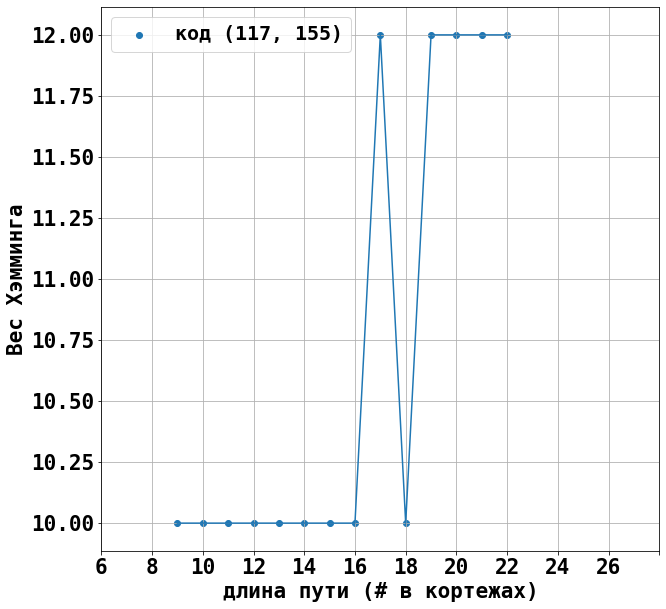

In [15]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(M + 1, N + 1), wrow[M:])
plt.scatter(range(M + 1, N + 1), wrow[M:], label = f'код ({polyoct[0]}, {polyoct[1]})')
plt.grid()
plt.xlabel(u'длина пути (# в кортежах)', **font)
plt.ylabel(u'Вес Хэмминга', **font)
plt.legend(loc=2, prop={'size': 20})
plt.xticks(range(4, 27, 2), range(6, 27, 2));
plt.savefig(f'actd_{polyoct[0]}{polyoct[1]}_rus.png', dpi=150)

In [16]:
answ, ansc = find_spectrum(t, 0, 0, 15)

In [17]:
code = ['7553', '7361']
answ.keys()

dict_keys([7, 8, 9, 10, 11, 12, 13, 14, 15])

In [18]:
code = ['117_155']
answ.keys()

dict_keys([7, 8, 9, 10, 11, 12, 13, 14, 15])

In [20]:
fans = open('results/spectr'+code[0]+'.dat', 'w')
for k in answ.keys():
    fans.write(str(k)+'\n')
    for elem in answ[k]:
        fans.write(str(elem) + ' ')
    fans.write('\n')
    for elem in ansc[k]:
        fans.write(str(elem) + ' ')
    fans.write('\n')
fans.close()

In [116]:
answ, ansc = find_spectrum(t, 0, 0, 25)

In [118]:
fans = open('results/spectr'+code[1]+'.dat', 'w')
for k in answ.keys():
    fans.write(str(k)+'\n')
    for elem in answ[k]:
        fans.write(str(elem) + ' ')
    fans.write('\n')
    for elem in ansc[k]:
        fans.write(str(elem) + ' ')
    fans.write('\n')
fans.close()

In [93]:
answ, ansc #3523

({5: array([7]),
  6: array([8]),
  7: array([ 9, 10]),
  8: array([ 7, 10, 11]),
  9: array([ 8, 10, 11, 12, 13]),
  10: array([ 9, 10, 11, 12, 13, 14, 17]),
  11: array([10, 11, 12, 13, 14, 15, 16, 18]),
  12: array([ 8, 10, 11, 12, 13, 14, 15, 16, 17, 19]),
  13: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
  14: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
  15: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
  16: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
  17: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
  18: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
         28, 30]),
  19: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
         28, 29, 30, 31]),
  20: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 34]),
  21: array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22,

In [84]:
answ, ansc #3133

({5: array([7]),
  6: array([8]),
  7: array([ 7, 12]),
  8: array([ 8, 11]),
  9: array([ 9, 10, 13, 14]),
  10: array([ 8,  9, 10, 11, 12, 13, 14, 15]),
  11: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
  12: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  13: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
  14: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24]),
  15: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
  16: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
  17: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
  18: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30]),
  19: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
         28, 29, 30, 31]),
  20: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33]),
  21: array([13, 14, 15, 16, 17, 18, 19, 20,

In [74]:
answ, ansc #1317

({4: array([7]),
  5: array([6]),
  6: array([7, 8]),
  7: array([ 7,  8, 10, 11]),
  8: array([ 8,  9, 10, 12, 14]),
  9: array([ 8,  9, 10, 11, 12, 13]),
  10: array([ 9, 10, 11, 12, 13, 14, 15]),
  11: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
  12: array([10, 11, 12, 13, 14, 15, 16, 17, 19, 21]),
  13: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
  14: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
  15: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
  16: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28]),
  17: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
  18: array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
  19: array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32]),
  20: array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
         31, 33, 35]),
  21: array([14, 15, 16, 17, 18, 19, 20, 21, 22, 

In [65]:
answ, ansc #1315

({4: array([6]),
  5: array([8]),
  6: array([6, 8]),
  7: array([ 8, 10]),
  8: array([ 8, 10, 12]),
  9: array([ 8, 10, 12, 14]),
  10: array([ 8, 10, 12, 14, 16]),
  11: array([ 8, 10, 12, 14, 16]),
  12: array([10, 12, 14, 16, 18]),
  13: array([10, 12, 14, 16, 18, 20]),
  14: array([10, 12, 14, 16, 18, 20, 22]),
  15: array([10, 12, 14, 16, 18, 20, 22, 24]),
  16: array([10, 12, 14, 16, 18, 20, 22, 24, 26]),
  17: array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  18: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
  19: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  20: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  21: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]),
  22: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
  23: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]),
  24: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]),
  25: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44

In [55]:
answ, ansc #0705

({3: array([5]),
  4: array([6]),
  5: array([6, 7]),
  6: array([ 7,  8, 10]),
  7: array([ 7,  8,  9, 11]),
  8: array([ 8,  9, 10, 11, 12]),
  9: array([ 8,  9, 10, 11, 12, 13, 15]),
  10: array([ 9, 10, 11, 12, 13, 14, 16]),
  11: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17]),
  12: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 20]),
  13: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21]),
  14: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
  15: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25]),
  16: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]),
  17: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
  18: array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30]),
  19: array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         31]),
  20: array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
         31, 32]),
  21: array([14, 15, 16, 17, 18, 19, 20, 21

In [115]:
answ, ansc #7553

({6: array([9]),
  7: array([10]),
  8: array([8, 9]),
  9: array([10, 11, 12]),
  10: array([ 9, 10, 11, 13, 14]),
  11: array([ 9, 10, 11, 12, 14, 15, 17]),
  12: array([ 9, 10, 12, 13, 14, 15, 16, 17, 18]),
  13: array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  14: array([ 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
  15: array([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
  16: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
  17: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
  18: array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
         30]),
  19: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31]),
  20: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32]),
  21: array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33, 34]),
  22: array([12, 13

In [119]:
answ, ansc #7361

({6: array([8]),
  7: array([8]),
  8: array([ 8, 12]),
  9: array([12]),
  10: array([10, 14]),
  11: array([10, 12, 14, 16, 18]),
  12: array([10, 12, 14, 16, 18]),
  13: array([10, 12, 14, 16, 18, 20, 22]),
  14: array([10, 12, 14, 16, 18, 20, 22]),
  15: array([12, 14, 16, 18, 20, 22, 24]),
  16: array([12, 14, 16, 18, 20, 22, 24, 26]),
  17: array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
  18: array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  19: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
  20: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  21: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  22: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]),
  23: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]),
  24: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]),
  25: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])},
 {6: array([1]),
  7: array([1]),
  8: array([1, 1]),
  9: array([4]),
  10: array([5, 3]),
  11: array([

In [21]:
answ, ansc #117 155

({7: array([10]),
  8: array([10]),
  9: array([10, 12]),
  10: array([10, 12, 14]),
  11: array([10, 12, 14, 16]),
  12: array([10, 12, 14, 16]),
  13: array([10, 12, 14, 16, 18, 22]),
  14: array([10, 12, 14, 16, 18, 20]),
  15: array([12, 14, 16, 18, 20, 22, 24]),
  16: array([10, 12, 14, 16, 18, 20, 22, 24]),
  17: array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  18: array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  19: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  20: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  21: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  22: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  23: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
  24: array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]),
  25: array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])},
 {7: array([1]),
  8: array([1]),
  9: array([1, 1]),
  10: array([2, 1, 1]),
  11: array([2, 1, 4, 1]),
  12: array([1, 5, 3, 7]

In [2]:
poly=[7, 6]     #M=2 R=1/2 d_free=4  alpha=2/3 41.81 dmax(row-cseg)=2
# poly=[7 5];     #M=2 R=1/2 d_free=5  alpha=1/2  30.00 dmax(row-cseg)=4
# poly=[15 14];   #M=3 R=1/2 d_free=5  alpha=4/7  34.85 dmax(row-cseg)=5
# poly=[15 17];   #M=3 R=1/2 d_free=6  alpha=1/2  30.00 dmax(row-cseg)=5

# poly=[31 35];   #M=4 R=1/2 d_free=7  alpha=3/8  22.02 dmax(row-cseg)=6
# poly=[70 65];   #M=5 R=1/2 d_free=7  alpha=4/9  26.39 dmax(row-cseg)=4
# poly=[76 65];   #M=5 R=1/2 d_free=8  alpha=2/5  23.58 dmax(row-cseg)=5

# poly=[15 13];   #M=3 R=1/2 d_free=6  alpha=2/5  23.58 dmax(row-cseg)=5
# poly=[31 33];   #M=4 R=1/2 d_free=7  alpha=1/3  19.47 dmax(row-cseg)=7
# poly=[35 23];   #M=4 R=1/2 d_free=7  alpha=4/11 21.32 dmax(row-cseg)=6
# poly=[37 25];   #M=4 R=1/2 d_free=6  alpha=1/3  19.47 dmax(row-cseg)=3
# poly=[37 33];   #M=4 R=1/2 d_free=6  alpha=2/5,1/3  23.58 19.47dmax(row-cseg)=4  ***
# poly=[73 61];   #M=5 R=1/2 d_free=8  alpha=4/13 17.92 dmax(row-cseg)=5
# poly=[65 57];   #M=5 R=1/2 d_free=8  alpha=1/3,5/14  19.47 dmax(row-cseg)=3
# poly=[75 53];   #M=5 R=1/2 d_free=8  alpha=1/3  19.47 dmax(row-cseg)=3
# poly=[147 135]; #M=6 R=1/2 d_free=10 alpha=8/25 18.66 dmax(row-cseg)=7
# poly=[171 133]; #M=6 R=1/2 d_free=10 alpha=4/13 17.92 dmax(row-cseg)=5
# poly=[13 17];   #M=3 R=1/2 d_free=6  alpha=1/2  30.00 dmax(row-cseg)=4
# poly=[155 117]; #M=6 R=1/2 d_free=10 alpha=4/13 17.92 dmax(row-cseg)=5

# poly=[23 37]; #M=4 R=1/2 d_free=6
# poly=[45 75]; #M=5 R=1/2 d_free=8
# poly=[45 67]; #M=5 R=1/2 d_free=8
# poly=[75 67]; #M=5 R=1/2 d_free=8
# poly=[103 127]; #M=6 R=1/2 d_free=8
# poly=[103 155]; #M=6 R=1/2 d_free=8
# poly= [103 147]; #M=6 R=1/2 d_free=8
# poly=[127 155]; #M=6 R=1/2 d_free=8
# poly=[155 147]; #M=6 R=1/2 d_free=8
# poly=[127 155]; #M=6 R=1/2 d_free=8
# poly=[127 147]; #M=6 R=1/2 d_free=8
# poly=[217 235];  #M=7 R=1/2 d_free=10
# poly=[367 277];  #M=7 R=1/2 d_free=8 (*)
# poly=[235 277];  #M=7 R=1/2 d_free=10
# poly=[345 277];  #M=7 R=1/2 d_free=10
# poly=[37 7];